In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [3]:
# Surpress globally the use of exponential numbers
pd.options.display.float_format = '{:.4f}'.format

# #feature_importance.round(3) or do it manually with this code

In [4]:
dataset_path_USA = os.path.join('../../datasets/USA_houseprices_2014/')
file_name_USA = 'preprocessed_data_USAhouseprices2014.csv'
df = pd.read_csv(dataset_path_USA + file_name_USA)

X = df.drop(['price'], axis = 1)
y = df['price']

Text(0.5, 1.0, 'CART - Feature Weights for USA Housing Dataset')

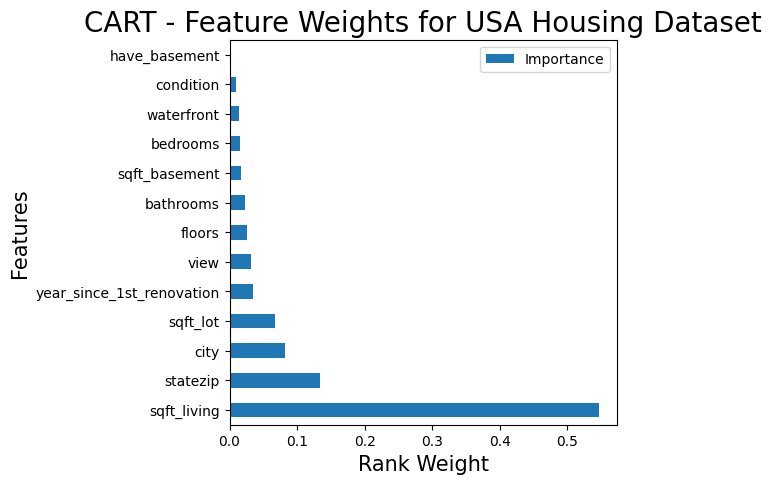

In [6]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state =  42)
# Train model
model = dtr.fit(X, y)

feat_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(5,5))

plt.ylabel('Features', fontsize = 15)
plt.xlabel('Rank Weight', fontsize = 15)
plt.title('CART - Feature Weights for USA Housing Dataset', fontsize = 20)

In [ ]:
#elastic_net_USA.to_csv('../../data/cross_validation_USA/el_ranks.csv', sep=';',index=False)

In [5]:
output = cross_validate(dtr, X.values, y, cv=5, scoring = 'neg_mean_squared_error', return_estimator =True)

for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for Decision Tree estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for Decision Tree estimator 0:
                           importance
sqft_living                    0.5430
statezip                       0.1366
city                           0.0797
sqft_lot                       0.0677
view                           0.0371
year_since_1st_renovation      0.0317
bathrooms                      0.0299
floors                         0.0185
sqft_basement                  0.0179
condition                      0.0143
bedrooms                       0.0127
waterfront                     0.0080
have_basement                  0.0028
Features sorted by their score for Decision Tree estimator 1:
                           importance
sqft_living                    0.5441
statezip                       0.1178
city                           0.0757
sqft_lot                       0.0572
bathrooms                      0.0442
view                           0.0323
year_since_1st_renovation      0.0285
sqft_basement                  0.0273
fl